In [11]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [12]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


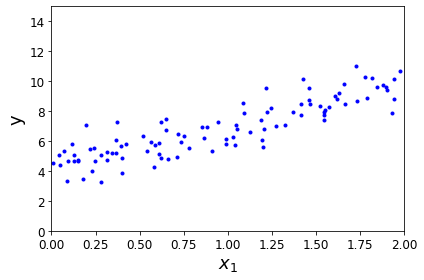

In [13]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
plt.ylabel("y", fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [14]:
X_b = np.c_[np.ones((100, 1)), X] 
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [15]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [16]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [17]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

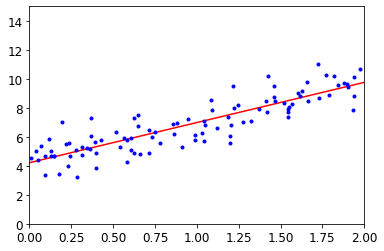

In [18]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Saving figure linear_model_predictions_plot


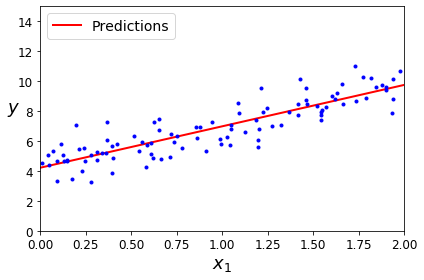

In [19]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [21]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [22]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd
residuals
rank
s

array([14.37020392,  4.11961067])

In [23]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

In [24]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [25]:
theta

array([[4.21509616],
       [2.77011339]])

In [26]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [27]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 100
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 90 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


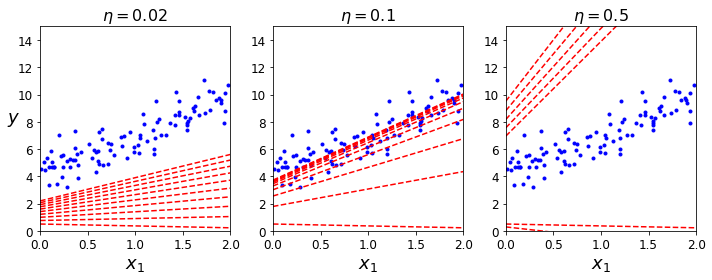

In [28]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131);plot_gradient_descent(theta, eta = 0.02)
plt.ylabel('$y$', rotation=0, fontsize = 18)
plt.subplot(132); plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133);plot_gradient_descent(theta, eta = 0.5)

save_fig('gradient_descent_plot')
plt.show()


Stochastic Gradient Descent

In [29]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


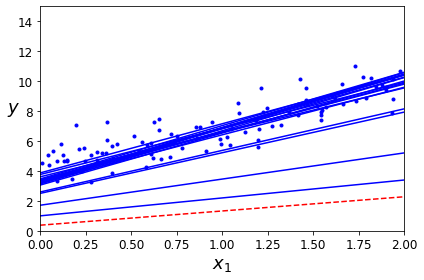

In [30]:
n_epochs = 50
t0,t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.rand(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch ==0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i>0 else 'r--'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

plt.plot(X,y, 'b.')
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0,2,0,15])
save_fig('sgd_plot')
plt.show()

In [31]:
theta

array([[4.21047895],
       [2.74881457]])

In [32]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty= None, eta0= 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [33]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

Mini-batch Gradient Descent

In [34]:
theta_path_mbgd = []
n_iterations = 50
minibatch_size = 20
np.random.seed(42)
t0,t1 = 200, 1000
def learning_schedule(t):
    return t0/(t+t1)

t= 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t+=1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mbgd.append(theta)

In [35]:
theta

array([[4.25214646],
       [2.78964071]])

In [36]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mbgd = np.array(theta_path_mbgd)

In [37]:
len(theta_path_bgd)

100

In [38]:
plt.figure(figsize = (7,4))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], 'r-s', linewidth = 1, label = 'stochastic')
plt.plot(theta_path_mbgd[:,0], theta_path_mbgd[:,1], 'g-+', linewidth = 2, label = 'Mini-batch')
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], 'b-o', linewidth = 3, label = 'Batch')
plt.legent(loc = 'upper left', fontsize=16)
plt.xlabel(r'$\theta_0$', fontsize = 20)
plt.ylabel(r'$\theta_1$', fontsize = 20, rotation =0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig('gradient_descent_paths_plot')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 504x288 with 0 Axes>

Polynomial Regression

In [39]:
import numpy as np
import numpy.random as rnd

m=100
X = 6* np.random.rand(m,1)-3
y = 0.5*X**2 + X+2+np.random.randn(m,1)

Saving figure quadratic_data_plot


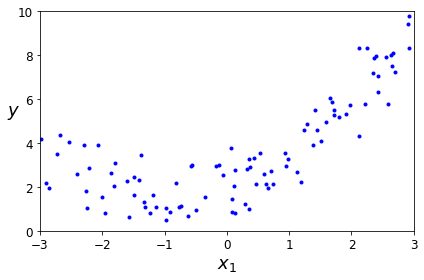

In [40]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$', rotation =0, fontsize = 18)
plt.axis([-3, 3, 0, 10])
save_fig('quadratic_data_plot')
plt.show()


In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [42]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

Saving figure quadratic_predictions_plot


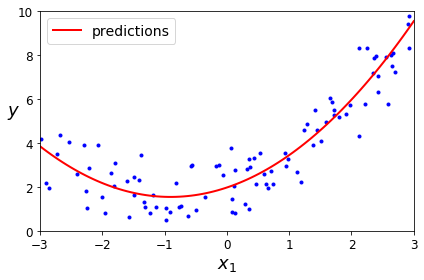

In [44]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, 'r-', linewidth = 2, label ='predictions')
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$',rotation = 0, fontsize = 18)
plt.legend(loc='upper left', fontsize = 14)
plt.axis([-3, 3, 0, 10])
save_fig('quadratic_predictions_plot')
plt.show()

Saving figure high_dgeree_polynomails_plot


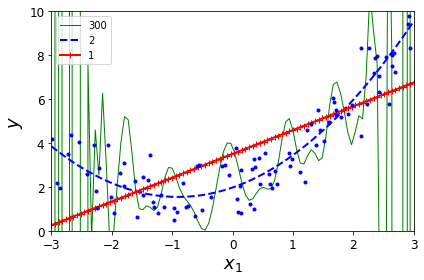

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width , degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    polybig_features = PolynomialFeatures(degree = degree, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ('poly_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg),
        ])
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth = width)

plt.plot(X,y,'b.',linewidth =3)
plt.legend(loc = 'upper left')
plt.xlabel('$x_1$', fontsize =18)
plt.ylabel('$y$', fontsize =18)
plt.axis([-3, 3, 0, 10])
save_fig('high_dgeree_polynomails_plot')
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'val')
    plt.legend(loc = 'upper right', fontsize = 14)
    plt.xlabel('training set size', fontsize = 14)
    plt.ylabel('Rmse', fontsize=14)

Saving figure underfitting_learning_curves_plot


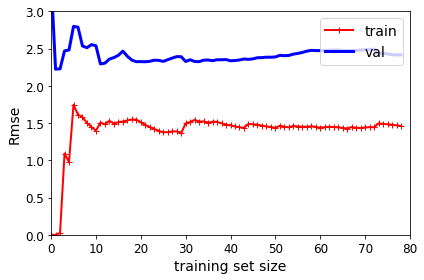

In [52]:
lin_reg  = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
save_fig('underfitting_learning_curves_plot')
plt.show()

Saving figure learning_curves_plot


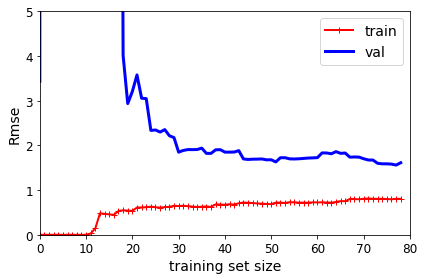

In [53]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 5])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown
#Overfitting example

Saving figure Quadratic_learning_curves_plot


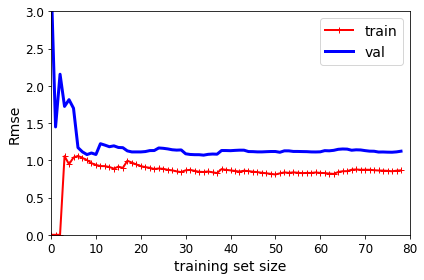

In [54]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("Quadratic_learning_curves_plot")  # not shown
plt.show()                        # not shown
#Overfitting example

### Regularized models

In [55]:
np.random.seed(42)
m = 20
X = 3*np.random.rand(m,1)
y = 1+ 0.5*X+ np.random.randn(m,1)/1.5
X_new = np.linspace(0, 3, 100). reshape(100, 1)

Saving figure generatedRegM_data_plot


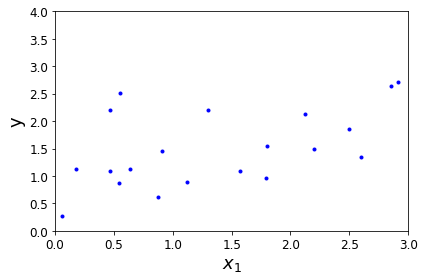

In [56]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
plt.ylabel("y", fontsize=18)
plt.axis([0, 3, 0, 4])
save_fig("generatedRegM_data_plot")
plt.show()

In [57]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver = 'cholesky', random_state = 42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

Saving figure ridge_reg_plot


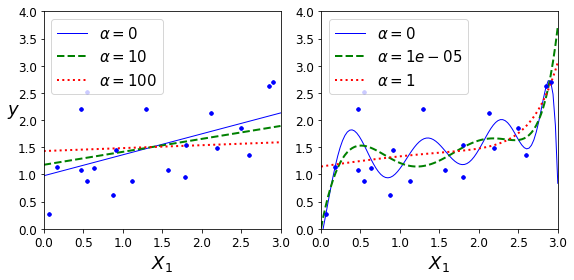

In [60]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
                ('std_scaler', StandardScaler()),
                ('regul_reg', model),
                ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw =2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth = lw, label = r'$\alpha = {}$'.format(alpha))
        plt.plot(X, y, 'b.', linewidth = 3)
    plt.legend(loc = 'upper left', fontsize = 15)
    plt.xlabel('$X_1$', fontsize = 18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize = (8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial = False, alphas = (0, 10,100), random_state = 42)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.subplot(122)
plot_model(Ridge, polynomial = True, alphas = (0, 10**-5, 1), random_state = 42)


save_fig('ridge_reg_plot')
plt.show()

In [61]:
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.4717882])

C:\Users\vinym\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  positive)


Saving figure lasso_reg_plot


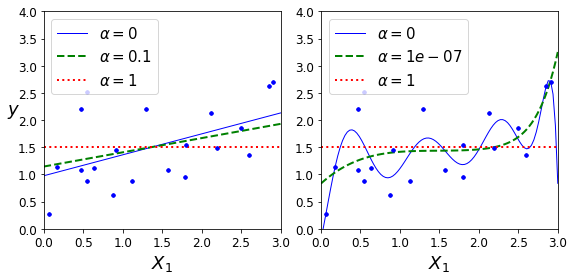

In [62]:
from sklearn.linear_model import Lasso
plt.figure(figsize = (8,4))
plt.subplot(121)
plot_model(Lasso, polynomial = False, alphas =(0, 0.1,1), random_state = 42)
plt.ylabel('$y$', rotation=0, fontsize = 18)
plt.subplot(122)
plot_model(Lasso, polynomial = True, alphas =(0, 10**-7,1), random_state = 42)

save_fig('lasso_reg_plot')
plt.show()

In [63]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [64]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [65]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [66]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Saving figure early_stopping_plot


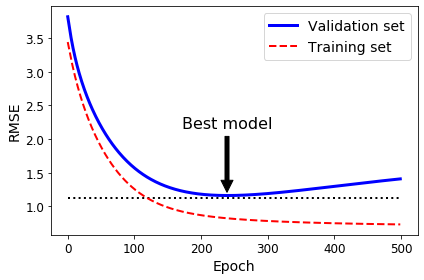

In [49]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )
best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [50]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

#### Logistic Regression

Saving figure logistic_function_plot


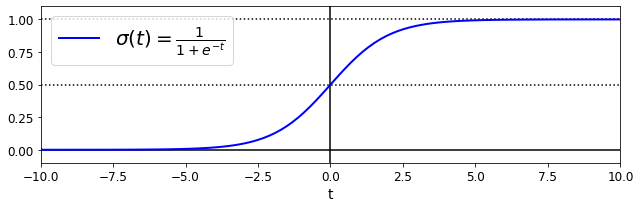

In [67]:
t = np.linspace(-10,  10, 100)
sig = 1/(1+np.exp(-t))
plt.figure(figsize = (9,3))
plt.plot([-10, 10], [0, 0], 'k-')
plt.plot([-10, 10], [0.5, 0.5], 'k:')
plt.plot([-10, 10], [1, 1], 'k:')
plt.plot([0, 0], [-1.1, 1.1], 'k-')
plt.plot(t, sig, 'b-', linewidth = 2, label = r'$\sigma(t) = \frac{1}{1+e^{-t}}$')
plt.xlabel('t')
plt.legend(loc = 'upper left', fontsize = 20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig('logistic_function_plot')
plt.show()

In [68]:
from sklearn import datasets
iris  = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [69]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [70]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [71]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'lbfgs', random_state = 42)
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

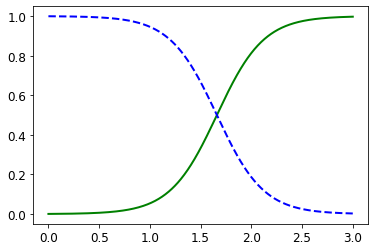

In [73]:
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

C:\Users\vinym\anaconda3\lib\site-packages\matplotlib\patches.py:1306: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


Saving figure logistic_regression_plot


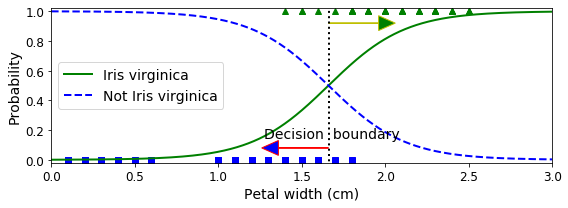

In [74]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs") #fig element - blue squares
plt.plot(X[y==1], y[y==1], "g^") # fig element - green carets
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2) # fig element 'black dots decision boundary'
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica") #data
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica") #data
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center") #fig element-text for boundary
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.1, head_length=0.1, fc='b', ec='r') #fig element  - arrow
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.1, head_length=0.1, fc='g', ec='y') #fig element - arrow
plt.xlabel("Petal width (cm)", fontsize=14) #fig element axis names
plt.ylabel("Probability", fontsize=14)#fig element axis names
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [75]:
decision_boundary

array([1.66066066])

In [76]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [77]:
#Logistic Regressio with 2 features of iris - Petal width and length
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)
'''For generating testing data set(X_new) & for predicting y(y_proba)'''
#np.meshgrid  - Return coordinate matrices from coordinate vectors.
#np.reshape - A numpy matrix can be reshaped into a vector using reshape function with parameter -1
# np.linspace - Return evenly spaced numbers over a specified interval.
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
#x0. shape = (200, 500); same for x1 - corresponding to generated numbers for petal width & length
X_new = np.c_[x0.ravel(), x1.ravel()] #Translates slice objects to concatenation along the second axis. len(X_new) = 10000, 2
y_proba = log_reg.predict_proba(X_new)

In [78]:
log_reg.coef_

array([[ 5.75452052, 10.44681114]])

Saving figure logistic_regression_contour_plot


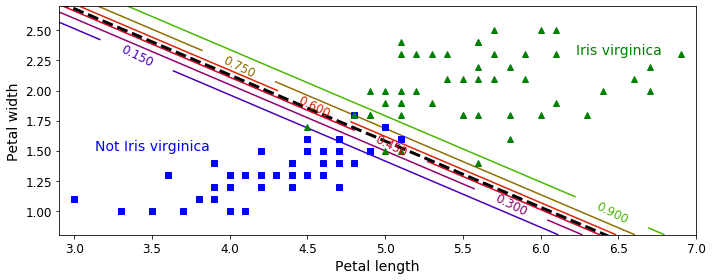

In [79]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)#
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)#
left_right = np.array([2.9, 7])#
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]#
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")# whats 'ha'
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

In [81]:
zz.shape

(200, 500)

In [131]:
x0.shape

(200, 500)

In [64]:
X = iris['data'][:, (2,3)]
y = iris['target']
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
softmax_reg.predict([[5,2]])

array([2])

In [67]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [70]:
#For generating new X instances for prediction & prediction probability
x0, x1 = np.meshgrid(
    np.linspace(0,8, 500).reshape(-1,1),
    np.linspace(0, 3.5, 200).reshape(-1,1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()] #concantenation along 2nd axis
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

Saving figure softmax_regression_contour_plot


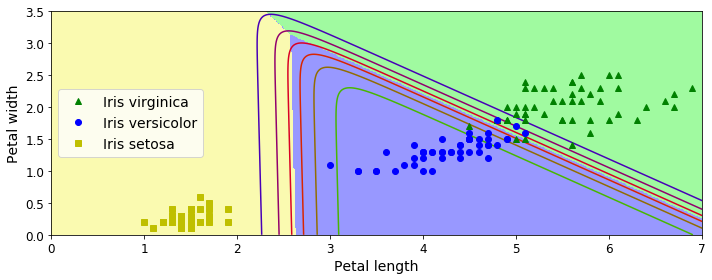

In [105]:
#Two new elements in the fig 4-25- pastel background & contour lines - both generated by contour 
zz1 = y_proba[:,1].reshape(x0.shape) # shape - (200,500)
zz = y_predict.reshape(x0.shape) # shape - (200,500)
#plotting the original data
plt.figure(figsize=(10,4))
plt.plot(X[y==2, 0], X[y==2,1], 'g^', label = 'Iris virginica')
plt.plot(X[y==1, 0], X[y==1,1], 'bo', label = 'Iris versicolor')
plt.plot(X[y==0, 0], X[y==0,1], 'ys', label = 'Iris setosa')

from matplotlib.colors import ListedColormap
#custom_cmap = ListedColormap(['red','blue','green']) 
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0']) # calling the pastel colors of interest here for the background
plt.contourf(x0, x1, zz, cmap=custom_cmap) #x0, x1 are 2d arrays(ccordinated of z),
#z is the height values on which contour are drawn
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg) # 'f'illed contour lines
#legend, axis labels,  axis truncation, saving and showing
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

In [101]:
zz.shape

(200, 500)

#### 12. Batch Gradient Descent with early stopping for Softmax Regression

In [86]:
from sklearn import datasets
iris  = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

We need to add the bias term for every instance ($x_0 = 1$):

In [87]:
X.shape

(150, 2)

In [88]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [89]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]
X_with_bias.shape

(150, 3)

In [90]:
X_with_bias

array([[1. , 1.4, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.7, 0.4],
       [1. , 1.4, 0.3],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.1],
       [1. , 1.5, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.4, 0.1],
       [1. , 1.1, 0.1],
       [1. , 1.2, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1.3, 0.4],
       [1. , 1.4, 0.3],
       [1. , 1.7, 0.3],
       [1. , 1.5, 0.3],
       [1. , 1.7, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1. , 0.2],
       [1. , 1.7, 0.5],
       [1. , 1.9, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.6, 0.4],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1.5, 0.1],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.2, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.4, 0.1],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.3, 0.3],
       [1. , 1.3

In [92]:
np.random.seed(2042)

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's
train_test_split() function, but 'the point of this exercise is to try understand the algorithms by implementing them manually'. Thi sis to know what Scikit learn does under the hood!

In [93]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]] #X_train.shape = (90, 3)
y_train = y[rnd_indices[:train_size]] #y_train.shape = (90,)
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]  #(30,3)
y_valid = y[rnd_indices[train_size:-test_size]] #(30,)
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [94]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [95]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [96]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [97]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [98]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums
#Computing the softmax probability directly from formula

In [99]:
n_inputs = X_train.shape[1] # = 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # = 3 (3 iris classes)

In [102]:
Theta = np.random.randn(n_inputs, n_outputs)
print(Theta)

[[-0.49711468 -1.55612511  0.9501633 ]
 [-0.04768924 -0.08276245  1.39725682]
 [ 0.2133024  -1.21905374  1.03031178]]


the equations we will need are the cost function:

$J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits{i=1}^{m} \sum\limits{k=1}^{K} {y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting nan values.

In [103]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
        print(Theta)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 4.742639033914859
[[ 1.80988989 -0.54997293  1.09200727]
 [ 0.43406129 -1.6441017   0.51898445]
 [ 1.31686239  0.44491099  0.90549837]]
500 0.7216880823119456
[[ 2.14635113 -0.15836738  0.36394047]
 [-0.70320829  0.05460935 -0.04245702]
 [ 0.73340975  0.89252442  1.04133757]]
1000 0.6204887212670228
[[ 2.57854254 -0.14230788 -0.08431043]
 [-0.77858282  0.1046381  -0.01711124]
 [ 0.55945446  0.80513123  1.30268605]]
1500 0.5578624004739455
[[ 2.91519293e+00 -1.27114557e-01 -4.36154145e-01]
 [-8.40486287e-01  1.48125562e-01  1.30476909e-03]
 [ 4.25170232e-01  7.28048848e-01  1.51405266e+00]]
2000 0.5145425566126578
[[ 3.19186598 -0.11005868 -0.72988307]
 [-0.8924195   0.18560335  0.01576019]
 [ 0.31582403  0.65863401  1.69281371]]
2500 0.4821902740010116
[[ 3.42818224 -0.09072531 -0.9855327 ]
 [-0.93698038  0.2179974   0.02792702]
 [ 0.22320163  0.59557825  1.84849187]]
3000 0.4566988357061257
[[ 3.63572961 -0.06931567 -1.2144897 ]
 [-0.97596731  0.24614418  0.03876718]
 [ 0.14243913  

In [104]:
Theta

array([[ 4.29312369,  0.03073838, -1.97193784],
       [-1.0965798 ,  0.32806673,  0.07745712],
       [-0.11010737,  0.35188545,  2.42549367]])

predictions for the validation set and check the accuracy score:

In [105]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Well, this model looks pretty good. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of Theta since this corresponds to the bias term). Also, let's try increasing the learning rate eta.

In [106]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]] #extra terms - L2regularization
    Theta = Theta - eta * gradients

0 3.31466679236949
500 0.5378947790755032
1000 0.5046573947978396
1500 0.495053896867844
2000 0.49144306574659347
2500 0.48996109323924647
3000 0.4893260109906385
3500 0.48904708136462194
4000 0.488922726781738
4500 0.4888667580914424
5000 0.48884141287504024


In [107]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [108]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 1.4586514695641895
500 0.5603809070579142
1000 0.5401156174519325
1500 0.5345862586106911
2000 0.5329279189467603
2500 0.5325551999881962
2631 0.5325447576940657
2632 0.5325447585230719 early stopping!


In [109]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

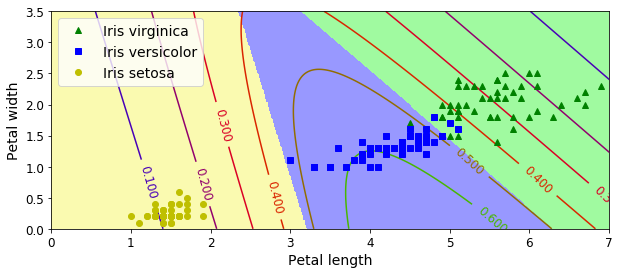

In [110]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()


In [55]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333